<a href="https://colab.research.google.com/github/Aomaphisara/bsc_dpdm22/blob/main/midterm_dpdm22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 ทำนายราคาบ้าน 10 คะแนน
เตรียมข้อมูลเพื่อทำนายราคาบ้าน ราคาประเมินบ้าน และ คะแนนทรัพย์ จาก [google drive](https://drive.google.com/drive/folders/1uIcUFY1yldIq-A3wijh2n2N6az-EljIe?usp=sharing) โดยข้อมูลที่เตรียมต้องประกอบด้วย columns ต่อไปนี้

* ```'renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price'``` จากตาราง "คำตอบนักประเมิน(ID)"

* ```จำนวน 7-11 และ โรงเรียน ในรัศมี 200,500,1000,2000 เมตร (ตั้งชื่อ d200-7/11','d500-7/11',...,'d2000-7/11' แบะ ;d200-school','d500-school',...,'d2000-school')``` จากตาราง "7-eleven.json" และ "school.json"

* ```ประเมินราคาซื้อขาย และ คะแนนทรัพย์ (ตั้งชื่อ 'estimator' และ 'score')``` จากตาราง คำตอบนักประเมิน(ID) โดยราคาประเมินกับคะแนนทรัพย์ อ้างอิงของนักประเมิน ID=01 คนเดียว

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import json
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [ ]:
/#เชื่อม google drive 
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.chdir('/content/gdrive/MyDrive/bsc_DPDM_data/Midterm')

#Data House

## บ้านมือ 2

In [ ]:
link = 'https://docs.google.com/spreadsheets/d/1REdJzoGqhVn3fnM1I0GoSLzzeW2dAr2UNo1b64hNbJY/export?format=xlsx'
home2 = pd.read_excel(link,sheet_name='บ้านมือ2')
home2.head()

,id,name_th,name_en,project_name,company,province,district,sub_district,property_type,home improvement,...,furniture,building_number,number_of_building,floor_number,parking_percentage,has_pool,has_keycard,has_security,has_fitness,has_garden
0,1.0,บ้านเดี่ยว ชนบท ขอนแก่น,บ้านเดี่ยว ชนบท ขอนแก่น,บ้านวังเวิน,NaN,ขอนแก่น,ชนบท,ศรีบุญเรือง,บ้านเดี่ยว,no,...,ไม่มี,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,บ้านเดี่ยว น้ำพอง ขอนแก่น,บ้านเดี่ยว น้ำพอง ขอนแก่น,บ้านหนองบัวบาน,NaN,ขอนแก่น,น้ำพอง,ทรายมูล,บ้านเดี่ยว,no,...,ไม่มี,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16.0,บ้านเดี่ยว มัญจาคีรี ขอนแก่น,บ้านเดี่ยว มัญจาคีรี ขอนแก่น,NaN,NaN,ขอนแก่น,มัญจาคีรี,กุดเค้า,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18.0,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านชลลดา,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านชลลดา,ชลลดา ขอนแก่น,บริษัท แลนด์แอนด์เฮ้าส์ จำกัด (มหาชน),ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19.0,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านเบสต์โฮม,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านเบสต์โฮม,เบสท์โฮม,เบสท์โฮม เลี่ยงเมืองขอนแก่น,ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
home2.columns

Index(['id', 'name_th', 'name_en', 'project_name', 'company', 'province',
       'district', 'sub_district', 'property_type', 'home improvement',
       'renovate', 'public utility', 'land type', 'land wide(m)',
       'land long(m)', 'topsoil', 'corner', 'zip_code', 'zone', 'alley',
       'street', 'latitude', 'longitude', 'number_of_rai', 'number_of_ngan',
       'number_of_va', 'construct_year', 'model', 'sell_price',
       'number_of_unit', 'number_of_story', 'number_of_bedroom',
       'number_of_bathroom', 'number_of_parking', 'usable_area',
       'central_cost', 'direction', 'furniture', 'building_number',
       'number_of_building', 'floor_number', 'parking_percentage', 'has_pool',
       'has_keycard', 'has_security', 'has_fitness', 'has_garden'],
      dtype='object')

In [ ]:
home2 = home2[['id','latitude', 'longitude','renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price']]
home2.head()

,id,latitude,longitude,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price
0,1.0,16.139321,102.631587,no,0.0,1.0,45.0,2.0,2.0,2.0,ไม่ระบุ,ไม่มี,244.0,2.0,390000.0
1,4.0,16.676156,102.917998,no,0.0,0.0,88.0,1.0,1.0,1.0,ไม่ระบุ,ไม่มี,164.0,3.0,820000.0
2,16.0,16.129358,102.530670,no,1.0,0.0,8.0,1.0,11.0,11.0,ไม่ระบุ,ไม่ระบุ,489.0,9.0,3260000.0
3,18.0,16.459052,102.806404,no,0.0,0.0,61.6,2.0,3.0,3.0,ไม่ระบุ,ไม่ระบุ,203.0,2.0,5000000.0
4,19.0,16.450000,102.800680,no,0.0,0.0,72.3,2.0,3.0,2.0,ไม่ระบุ,ไม่ระบุ,164.0,2.0,3500000.0


In [ ]:
home2['second_hand'] = 'บ้านมือ2'   

In [ ]:
home2

,id,latitude,longitude,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,second_hand
0,1.0,16.139321,102.631587,no,0.0,1.0,45.0,2.0,2.0,2.0,ไม่ระบุ,ไม่มี,244.00,2.0,390000.0,บ้านมือ2
1,4.0,16.676156,102.917998,no,0.0,0.0,88.0,1.0,1.0,1.0,ไม่ระบุ,ไม่มี,164.00,3.0,820000.0,บ้านมือ2
2,16.0,16.129358,102.530670,no,1.0,0.0,8.0,1.0,11.0,11.0,ไม่ระบุ,ไม่ระบุ,489.00,9.0,3260000.0,บ้านมือ2
3,18.0,16.459052,102.806404,no,0.0,0.0,61.6,2.0,3.0,3.0,ไม่ระบุ,ไม่ระบุ,203.00,2.0,5000000.0,บ้านมือ2
4,19.0,16.450000,102.800680,no,0.0,0.0,72.3,2.0,3.0,2.0,ไม่ระบุ,ไม่ระบุ,164.00,2.0,3500000.0,บ้านมือ2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,20460P,16.480110,102.574033,no,0.0,0.0,73.0,1.0,2.0,1.0,ไม่ระบุ,ไม่ระบุ,108.76,NaN,437400.0,บ้านมือ2
1652,20462P,16.528551,102.411762,no,0.0,0.0,84.0,1.0,2.0,1.0,ไม่ระบุ,ไม่ระบุ,119.00,NaN,714600.0,บ้านมือ2
1653,20463P,15.867444,102.482085,no,0.0,1.0,45.0,2.0,1.0,1.0,ไม่ระบุ,ไม่ระบุ,188.50,NaN,451000.0,บ้านมือ2
1654,20466P,16.636912,102.105343,no,0.0,1.0,59.0,2.0,1.0,1.0,ไม่ระบุ,ไม่ระบุ,207.00,NaN,910000.0,บ้านมือ2


In [ ]:
home2.isnull().any()  #falseคือไม่มีค่าว่าง trueคือมีค่าว่าง

id                    False
latitude               True
longitude              True
renovate               True
number_of_rai         False
number_of_ngan        False
number_of_va          False
number_of_story        True
number_of_bedroom      True
number_of_bathroom    False
direction             False
furniture             False
usable_area            True
number_of_parking      True
sell_price             True
second_hand           False
dtype: bool

In [ ]:
print(home2.isnull().sum()) 

id                      0
latitude               22
longitude              22
renovate              211
number_of_rai           0
number_of_ngan          0
number_of_va            0
number_of_story       549
number_of_bedroom      27
number_of_bathroom      0
direction               0
furniture               0
usable_area           920
number_of_parking     215
sell_price              1
second_hand             0
dtype: int64


In [ ]:
#fill NA with Text เลือกfillnaเนื่องจากค่าว่างของข้อมูลมีค่อนข้างเยอะ
home2['renovate'] = home2['renovate'].fillna('Unknown') #บ้านที่ไม่ได้เติมช่องรีโนเวท fillnaว่าunknown 

In [ ]:
# จำนวนลิฟต์และชั้น
home2[['number_of_story','number_of_parking','usable_area']]  = home2[['number_of_story','number_of_parking','usable_area']].fillna(0) 
# สิ่งอำนวยความสะดวก
home2[['number_of_bedroom']] = home2[['number_of_bedroom']].fillna(1) #จำนวนห้องนอนบ้านต้องมีอย่างน้อย 1 ห้อง

In [ ]:
home2['sell_price'] = home2['sell_price'].dropna()

In [ ]:
home2 = home2.dropna(subset=['sell_price'])

In [ ]:
home2['latitude'] = home2['latitude'].fillna('Unknown') 

<ipython-input-161-c6e7112fd863>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home2['latitude'] = home2['latitude'].fillna('Unknown')


In [ ]:
home2['longitude'] = home2['longitude'].fillna('Unknown')  

<ipython-input-162-4b7c6965449b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home2['longitude'] = home2['longitude'].fillna('Unknown')


In [ ]:
home2.isnull().any() 

id                    False
latitude              False
longitude             False
renovate              False
number_of_rai         False
number_of_ngan        False
number_of_va          False
number_of_story       False
number_of_bedroom     False
number_of_bathroom    False
direction             False
furniture             False
usable_area           False
number_of_parking     False
sell_price            False
second_hand           False
dtype: bool

In [ ]:
print(home2.isnull().sum()) 

id                    0
latitude              0
longitude             0
renovate              0
number_of_rai         0
number_of_ngan        0
number_of_va          0
number_of_story       0
number_of_bedroom     0
number_of_bathroom    0
direction             0
furniture             0
usable_area           0
number_of_parking     0
sell_price            0
second_hand           0
dtype: int64


## บ้านมือ 1

In [ ]:
link = 'https://docs.google.com/spreadsheets/d/1REdJzoGqhVn3fnM1I0GoSLzzeW2dAr2UNo1b64hNbJY/export?format=xlsx'
home1 = pd.read_excel(link,sheet_name='บ้านมือ1')
home1.head()

,id,parent_id,project_name,province,district,sub_district,zip_code,zone_id,zone,property_type,...,cable_free,cable_none,cable_ask,position_previous,position_current,sold_out_at,is_pro_in_house,created_at,updated_at,deleted_at
0,314.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,44012.0,44602.0,NaN
1,315.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านแฝด,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,44012.0,44602.0,NaN
2,316.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,44012.0,44602.0,NaN
3,317.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,44012.0,44602.0,NaN
4,318.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,44012.0,44602.0,NaN


In [ ]:
home1.columns

Index(['id', 'parent_id', 'project_name', 'province', 'district',
       'sub_district', 'zip_code', 'zone_id', 'zone', 'property_type',
       ...
       'cable_free', 'cable_none', 'cable_ask', 'position_previous',
       'position_current', 'sold_out_at', 'is_pro_in_house', 'created_at',
       'updated_at', 'deleted_at'],
      dtype='object', length=141)

In [ ]:
home1 = home1[['id','latitude','longitude','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price']]
home1.head()

,id,latitude,longitude,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price
0,314.0,16.392304,102.827926,NaN,NaN,50.00,2.0,4.0,3.0,0.0,0.0,185.0,2.0,3950000.0
1,315.0,16.392304,102.827926,NaN,NaN,40.00,2.0,4.0,3.0,0.0,0.0,165.0,2.0,3250000.0
2,316.0,16.392304,102.827926,NaN,NaN,77.25,2.0,4.0,3.0,0.0,0.0,260.0,2.0,6300000.0
3,317.0,16.392304,102.827926,NaN,NaN,81.25,2.0,6.0,5.0,0.0,0.0,343.0,3.0,6900000.0
4,318.0,16.392304,102.827926,NaN,NaN,55.00,2.0,4.0,4.0,0.0,0.0,223.0,2.0,4490000.0


In [ ]:
home1['second_hand'] = 'บ้านมือ1'   

In [ ]:
home1

,id,latitude,longitude,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,second_hand
0,314.0,16.392304,102.827926,NaN,NaN,50.00,2.0,4.0,3.0,0.0,0.0,185.0,2.0,3950000.0,บ้านมือ1
1,315.0,16.392304,102.827926,NaN,NaN,40.00,2.0,4.0,3.0,0.0,0.0,165.0,2.0,3250000.0,บ้านมือ1
2,316.0,16.392304,102.827926,NaN,NaN,77.25,2.0,4.0,3.0,0.0,0.0,260.0,2.0,6300000.0,บ้านมือ1
3,317.0,16.392304,102.827926,NaN,NaN,81.25,2.0,6.0,5.0,0.0,0.0,343.0,3.0,6900000.0,บ้านมือ1
4,318.0,16.392304,102.827926,NaN,NaN,55.00,2.0,4.0,4.0,0.0,0.0,223.0,2.0,4490000.0,บ้านมือ1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,62204519412ede001495e6cb,102.875722,16.484111,NaN,NaN,NaN,1.0,3.0,2.0,NaN,NaN,125.0,2.0,2290000.0,บ้านมือ1
750,62201e6fa441d30014e1f350,102.850706,16.410972,NaN,NaN,NaN,1.0,3.0,2.0,NaN,NaN,70.0,2.0,2590000.0,บ้านมือ1
751,5fa0e476a3326800191e29ea,102.614819,15.828671,NaN,NaN,NaN,1.0,3.0,2.0,NaN,NaN,120.0,2.0,1990000.0,บ้านมือ1
752,5e9d6fa69f161600121b61b2,102.402141,15.808013,NaN,NaN,NaN,1.0,3.0,2.0,NaN,NaN,100.0,2.0,1990000.0,บ้านมือ1


In [ ]:
home1.isnull().any() 

id                    False
latitude               True
longitude              True
number_of_rai          True
number_of_ngan         True
number_of_va           True
number_of_story        True
number_of_bedroom      True
number_of_bathroom     True
direction              True
furniture              True
usable_area            True
number_of_parking      True
sell_price             True
second_hand           False
dtype: bool

In [ ]:
print(home1.isnull().sum()) 

id                      0
latitude                9
longitude               9
number_of_rai         754
number_of_ngan        754
number_of_va           92
number_of_story         4
number_of_bedroom      10
number_of_bathroom     10
direction              88
furniture              88
usable_area            36
number_of_parking      21
sell_price             21
second_hand             0
dtype: int64


In [ ]:
#fill NA with Text เลืกfillnaเนื่องจากค่าว่างของข้อมูลมีค่อนข้างเยอะ
home1[['number_of_rai','number_of_ngan','number_of_va']] = home1[['number_of_rai','number_of_ngan','number_of_va']].fillna('Unknown') #บ้านที่ไม่ได้เติมช่องรีโนเวท fillnaว่าunknown 

In [ ]:
# จำนวนลิฟต์และชั้น
home1[['number_of_story','number_of_parking','usable_area','direction','furniture']]  = home1[['number_of_story','number_of_parking','usable_area','direction','furniture']].fillna(0) 
# สิ่งอำนวยความสะดวก
home1[['number_of_bedroom','number_of_bathroom']] = home1[['number_of_bedroom','number_of_bathroom']].fillna(1) #จำนวนห้องนอนบ้านต้องมีอย่างน้อย 1 ห้อง

In [ ]:
home1 = home1.dropna(subset=['sell_price'])

In [ ]:
home1['latitude'] = home1['latitude'].fillna('Unknown')  

<ipython-input-175-2329bb35c606>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home1['latitude'] = home1['latitude'].fillna('Unknown')


In [ ]:
home1['longitude'] = home1['longitude'].fillna('Unknown')     

<ipython-input-176-75997cbf9d22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home1['longitude'] = home1['longitude'].fillna('Unknown')


In [ ]:
home1.isnull().any() 

id                    False
latitude              False
longitude             False
number_of_rai         False
number_of_ngan        False
number_of_va          False
number_of_story       False
number_of_bedroom     False
number_of_bathroom    False
direction             False
furniture             False
usable_area           False
number_of_parking     False
sell_price            False
second_hand           False
dtype: bool

## Concat บ้านมือ1+2

In [ ]:
home = pd.concat([home2, home1])
home

,id,latitude,longitude,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,second_hand
0,1.0,16.139321,102.631587,no,0.0,1.0,45.0,2.0,2.0,2.0,ไม่ระบุ,ไม่มี,244.0,2.0,390000.0,บ้านมือ2
1,4.0,16.676156,102.917998,no,0.0,0.0,88.0,1.0,1.0,1.0,ไม่ระบุ,ไม่มี,164.0,3.0,820000.0,บ้านมือ2
2,16.0,16.129358,102.53067,no,1.0,0.0,8.0,1.0,11.0,11.0,ไม่ระบุ,ไม่ระบุ,489.0,9.0,3260000.0,บ้านมือ2
3,18.0,16.459052,102.806404,no,0.0,0.0,61.6,2.0,3.0,3.0,ไม่ระบุ,ไม่ระบุ,203.0,2.0,5000000.0,บ้านมือ2
4,19.0,16.45,102.80068,no,0.0,0.0,72.3,2.0,3.0,2.0,ไม่ระบุ,ไม่ระบุ,164.0,2.0,3500000.0,บ้านมือ2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,62204519412ede001495e6cb,102.875722,16.484111,NaN,Unknown,Unknown,Unknown,1.0,3.0,2.0,0.0,0.0,125.0,2.0,2290000.0,บ้านมือ1
750,62201e6fa441d30014e1f350,102.850706,16.410972,NaN,Unknown,Unknown,Unknown,1.0,3.0,2.0,0.0,0.0,70.0,2.0,2590000.0,บ้านมือ1
751,5fa0e476a3326800191e29ea,102.614819,15.828671,NaN,Unknown,Unknown,Unknown,1.0,3.0,2.0,0.0,0.0,120.0,2.0,1990000.0,บ้านมือ1
752,5e9d6fa69f161600121b61b2,102.402141,15.808013,NaN,Unknown,Unknown,Unknown,1.0,3.0,2.0,0.0,0.0,100.0,2.0,1990000.0,บ้านมือ1


In [ ]:
home.isnull().any()

id                    False
latitude              False
longitude             False
renovate               True
number_of_rai         False
number_of_ngan        False
number_of_va          False
number_of_story       False
number_of_bedroom     False
number_of_bathroom    False
direction             False
furniture             False
usable_area           False
number_of_parking     False
sell_price            False
second_hand           False
dtype: bool

#School

In [ ]:
with open('/content/gdrive/MyDrive/bsc_DPDM_data/Midterm/school.json') as json_file:
    school_json = json.loads(json_file.read())

In [ ]:
school_json.keys()  #โลเคชั่นของโรงเรียน

dict_keys(['1', '4', '6', '7', '9', '11', '16', '17', '18', '19', '2', '21', '22', '23', '24', '25', '26', '28', '29', '3', '31', '32', '33', '35', '36', '38', '491', '493', '494', '495', '496', '497', '498', '499', '508', '509', '51', '511', '512', '513', '515', '517', '518', '519', '52', '521', '522', '523', '524', '525', '526', '527', '528', '529', '531', '532', '533', '534', '535', '536', '537', '538', '539', '54', '541', '542', '543', '545', '546', '547', '548', '549', '55', '551', '552', '553', '554', '555', '557', '558', '56', '561', '562', '563', '564', '565', '566', '567', '568', '569', '57', '571', '572', '573', '574', '575', '576', '577', '578', '579', '58', '581', '582', '583', '584', '585', '586', '587', '588', '589', '59', '591', '592', '593', '594', '595', '596', '597', '598', '601', '602', '603', '604', '605', '606', '607', '608', '609', '61', '611', '612', '613', '614', '615', '616', '617', '618', '619', '62', '621', '622', '623', '624', '625', '626', '627', '628', '62

In [ ]:
len(school_json)#ดูว่ามีkeyทั้งหมดเท่าไหร่

3543

#Seven

In [ ]:
with open('/content/gdrive/MyDrive/bsc_DPDM_data/Midterm/7-eleven.json') as json_file:
    this_json = json.loads(json_file.read())

In [ ]:
this_json.keys()  #โลเคชั่นของเซเว่น

dict_keys(['1', '4', '6', '7', '9', '11', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '28', '29', '30', '31', '32', '33', '35', '36', '38', '40', '491', '493', '494', '495', '496', '497', '498', '499', '508', '509', '510', '511', '512', '513', '515', '517', '518', '519', '520', '521', '522', '523', '524', '525', '526', '527', '528', '529', '531', '532', '533', '534', '535', '536', '537', '538', '539', '540', '541', '542', '543', '545', '546', '547', '548', '549', '550', '551', '552', '553', '554', '555', '557', '558', '560', '561', '562', '563', '564', '565', '566', '567', '568', '569', '570', '571', '572', '573', '574', '575', '576', '577', '578', '579', '580', '581', '582', '583', '584', '585', '586', '587', '588', '589', '590', '591', '592', '593', '594', '595', '596', '597', '598', '600', '601', '602', '603', '604', '605', '606', '607', '608', '609', '610', '611', '612', '613', '614', '615', '616', '617', '618', '619', '620', '621', '622', '623', '624', '625',

In [ ]:
len(this_json)#ดูว่ามีkeyทั้งหมดเท่าไหร่

3653

# 2 ทำนายสภาพอากาศ 10 คะแนน
เตรียมข้อมูลเพื่อทำนายสภาพอากาศของวันถัดไป โดย 
- กลุ่มที่ 1 และ 9 ทำนาย อุณหภูมิตุ้มแห้ง (Y)
- กลุ่มที่ 2 ทำนาย อุณหภูมิต่ำสุด (Y)
- กลุ่มที่ 3 ทำนาย อุณหภูมิจุดน้ำค้าง (Y)
- กลุ่มที่ 4 ทำนาย จำนวนเมฆ (Y)
- กลุ่มที่ 5 ทำนาย ปริมาณฝน (Y)
- กลุ่มที่ 6 ทำนาย ความชื้นสัมพัทธ์ (Y)
- กลุ่มที่ 7 ทำนาย ความกด (Y)
- กลุ่มที่ 8 ทำนาย ความเร็วลม (Y)

ลักษณะของ data เป็นดังนี้ Xi คือ features อื่นๆที่ใช้ในทำนาย และ Y คือค่าที่ต้องการทำนาย

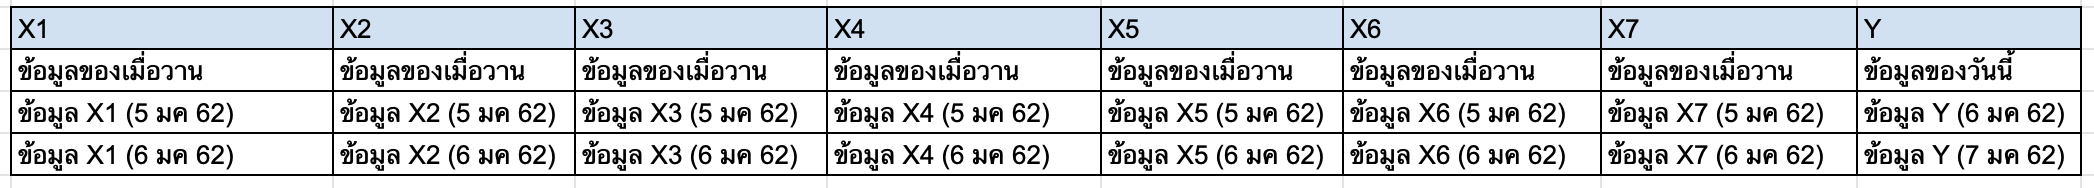


In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#ความกด(เปอร์เซ็นต์)

In [ ]:
#นำข้อมูลเข้า เปลียนชื่อคอลัมบ์
KH1 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34':'ความกด'})
NA1 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ความกด'})
SA1 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ความกด'})
NO1 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ความกด'})
LO1 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ความกด'})

KH1['จังหวัด'] = 'ขอนแก่น' #เพิ่มคอลัมน์จังหวัด
NA1['จังหวัด'] = 'นครพนม'
SA1['จังหวัด'] = 'สกลนคร'
NO1['จังหวัด'] = 'หนองคาย'
LO1['จังหวัด'] = 'เลย'

In [ ]:
pressure = [KH1, NA1, SA1, NO1, LO1] #ความกดอากาศ
allpres = pd.concat(pressure)

In [ ]:
allpres['เดือน'] = allpres['เดือน/ปี'].dt.month #การแยกเดือนปี
allpres['ปี'] = allpres['เดือน/ปี'].dt.year
del allpres['เดือน/ปี'] #ลบคอมลัมบ์ เดือน/ปี

##วนลูป

In [ ]:
p = list() #สร้างดิกชินารี่เข้ามาเก็บ
for index, row in allpres.iterrows():
  for i in range(1,32): #เพราะเราจะเอาคอลัมน์ที่มีชื่อว่า 1
         # print(f'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'ความกด -> ',row[i],row['จังหวัด'])
         p.append([row['จังหวัด'],'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'ความกด',row[i]])

pk = pd.DataFrame(p)    
pk = pd.DataFrame(p, columns=['จังหวัด','0','วันที่','1','เดือนที่','2','ปีที่','3','ความกด'])
pk.drop(['0', '1', '2','3'], 1, inplace=True)
pk    

<ipython-input-191-7abb420bcab1>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  pk.drop(['0', '1', '2','3'], 1, inplace=True)


,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด
0,ขอนแก่น,1,10,2011,1005.47
1,ขอนแก่น,2,10,2011,1006.65
2,ขอนแก่น,3,10,2011,1007.49
3,ขอนแก่น,4,10,2011,1008.28
4,ขอนแก่น,5,10,2011,1009.88
...,...,...,...,...,...
8520,เลย,27,2,2022,1014.97
8521,เลย,28,2,2022,1012.88
8522,เลย,29,2,2022,-
8523,เลย,30,2,2022,-


#ความชื้นสัมพัทธ์(เปอร์เซ็นต์)

In [ ]:
KH2 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ความชื้น'})
NA2 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ความชื้น'})
SA2 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ความชื้น'})
NO2 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ความชื้น'})
LO2 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ความชื้น'})

KH2['จังหวัด'] = 'ขอนแก่น' #เพิ่มคอลัมน์จังหวัด
NA2['จังหวัด'] = 'นครพนม'
SA2['จังหวัด'] = 'สกลนคร'
NO2['จังหวัด'] = 'หนองคาย'
LO2['จังหวัด'] = 'เลย'

In [ ]:
RH = [KH2, NA2, SA2, NO2, LO2] #ความชื้นสัมพัทธ์
allrh = pd.concat(RH)

In [ ]:
allrh['เดือน'] = allrh['เดือน/ปี'].dt.month #การแยกเดือนปี
allrh['ปี'] = allrh['เดือน/ปี'].dt.year
del allrh['เดือน/ปี'] #ลบคอมลัมบ์ เดือน/ปี

##วนลูป

In [ ]:
h = list() #สร้างดิกชินารี่เข้ามาเก็บ
for index, row in allrh.iterrows():
  for i in range(1,32): #เพราะเราจะเอาคอลัมน์ที่มีชื่อว่า 1
        #  print(f'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'ความชื้นสัมพัทธ์ -> ',row[i],row['จังหวัด'])
         h.append([row['จังหวัด'],'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'ความชื้นสัมพัทธ์',row[i]])

hk = pd.DataFrame(h)
hk = pd.DataFrame(h, columns=['จังหวัด','0','วันที่','1','เดือนที่','2','ปีที่','3','ความชื้นสัมพัทธ์'])
hk.drop(['0', '1', '2','3'], 1, inplace=True)
hk         

<ipython-input-195-ec0d87c32717>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  hk.drop(['0', '1', '2','3'], 1, inplace=True)


,จังหวัด,วันที่,เดือนที่,ปีที่,ความชื้นสัมพัทธ์
0,ขอนแก่น,1,10,2011,83
1,ขอนแก่น,2,10,2011,92
2,ขอนแก่น,3,10,2011,86
3,ขอนแก่น,4,10,2011,80
4,ขอนแก่น,5,10,2011,86
...,...,...,...,...,...
8520,เลย,27,2,2022,74
8521,เลย,28,2,2022,72
8522,เลย,29,2,2022,-
8523,เลย,30,2,2022,-


#ความเร็วลม(นอต)

In [ ]:
KH3 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ความเร็วลม'})
NA3 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ความเร็วลม'})
SA3 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ความเร็วลม'})
NO3 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ความเร็วลม'})
LO3 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ความเร็วลม'})

KH3['จังหวัด'] = 'ขอนแก่น' #เพิ่มคอลัมน์จังหวัด
NA3['จังหวัด'] = 'นครพนม'
SA3['จังหวัด'] = 'สกลนคร'
NO3['จังหวัด'] = 'หนองคาย'
LO3['จังหวัด'] = 'เลย'

In [ ]:
wind = [KH3, NA3, SA3, NO3, LO3] #ความเร็วลม
allwind = pd.concat(wind)

In [ ]:
allwind['เดือน'] = allwind['เดือน/ปี'].dt.month #การแยกเดือนปี
allwind['ปี'] = allwind['เดือน/ปี'].dt.year
del allwind['เดือน/ปี'] #ลบคอมลัมบ์ เดือน/ปี

##วนลูป

In [ ]:
w = list() #สร้างดิกชินารี่เข้ามาเก็บ
for index, row in allwind.iterrows():
  for i in range(1,32): #เพราะเราจะเอาคอลัมน์ที่มีชื่อว่า 1
        #  print(f'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'ความเร็วลม -> ',row[i],row['จังหวัด'])
         w.append([row['จังหวัด'],'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'ความเร็วลม',row[i]])

wk = pd.DataFrame(w)
wk = pd.DataFrame(w, columns=['จังหวัด','0','วันที่','1','เดือนที่','2','ปีที่','3','ความเร็วลม'])
wk.drop(['0', '1', '2','3'], 1, inplace=True)
wk

<ipython-input-199-b29ac182b223>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  wk.drop(['0', '1', '2','3'], 1, inplace=True)


,จังหวัด,วันที่,เดือนที่,ปีที่,ความเร็วลม
0,ขอนแก่น,1,10,2011,3
1,ขอนแก่น,2,10,2011,2
2,ขอนแก่น,3,10,2011,3
3,ขอนแก่น,4,10,2011,2
4,ขอนแก่น,5,10,2011,2
...,...,...,...,...,...
8520,เลย,27,2,2022,1
8521,เลย,28,2,2022,1
8522,เลย,29,2,2022,-
8523,เลย,30,2,2022,-


#จำนวนเมฆ(10ส่วน)

In [ ]:
KH4 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'จำนวนเมฆ'})
NA4 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'จำนวนเมฆ'})
SA4 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'จำนวนเมฆ'})
NO4 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'จำนวนเมฆ'})
LO4 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4).iloc[:,:35].rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'จำนวนเมฆ'})

KH4['จังหวัด'] = 'ขอนแก่น' #เพิ่มคอลัมน์จังหวัด
NA4['จังหวัด'] = 'นครพนม'
SA4['จังหวัด'] = 'สกลนคร'
NO4['จังหวัด'] = 'หนองคาย'
LO4['จังหวัด'] = 'เลย'

In [ ]:
cloud = [KH4, NA4, SA4, NO4, LO4] #ปริมาณเมฆ
allcloud = pd.concat(cloud)

In [ ]:
allcloud['เดือน'] = allcloud['เดือน/ปี'].dt.month #การแยกเดือนปี
allcloud['ปี'] = allcloud['เดือน/ปี'].dt.year
del allcloud['เดือน/ปี'] #ลบคอมลัมบ์ เดือน/ปี

##วนลูป

In [ ]:
c = list() #สร้างดิกชินารี่เข้ามาเก็บ
for index, row in allcloud.iterrows():
  for i in range(1,32): #เพราะเราจะเอาคอลัมน์ที่มีชื่อว่า 1
        #  print(f'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'จำนวนเมฆ -> ',row[i],row['จังหวัด'])
         c.append([row['จังหวัด'],'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'จำนวนเมฆ',row[i]])

ck = pd.DataFrame(c)
ck = pd.DataFrame(c, columns=['จังหวัด','0','วันที่','1','เดือนที่','2','ปีที่','3','จำนวนเมฆ'])
ck.drop(['0', '1', '2','3'], 1, inplace=True)
ck

<ipython-input-203-386856963272>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ck.drop(['0', '1', '2','3'], 1, inplace=True)


,จังหวัด,วันที่,เดือนที่,ปีที่,จำนวนเมฆ
0,ขอนแก่น,1,10,2011,9
1,ขอนแก่น,2,10,2011,10
2,ขอนแก่น,3,10,2011,10
3,ขอนแก่น,4,10,2011,8
4,ขอนแก่น,5,10,2011,10
...,...,...,...,...,...
8520,เลย,27,2,2022,3
8521,เลย,28,2,2022,2
8522,เลย,29,2,2022,-
8523,เลย,30,2,2022,-


#ปริมาณฝน(มิลลิลิตร)

In [ ]:
KH5 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ปริมาณฝน'})
NA5 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ปริมาณฝน'})
SA5 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ปริมาณฝน'})
NO5 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ปริมาณฝน'})
LO5 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ปริมาณฝน'})

KH5['จังหวัด'] = 'ขอนแก่น' #เพิ่มคอลัมน์จังหวัด
NA5['จังหวัด'] = 'นครพนม'
SA5['จังหวัด'] = 'สกลนคร'
NO5['จังหวัด'] = 'หนองคาย'
LO5['จังหวัด'] = 'เลย'

In [ ]:
rain = [KH5, NA5, SA5, NO5, LO5] #ปริมาณฝน
allrain = pd.concat(rain)

In [ ]:
allrain['เดือน'] = allrain['เดือน/ปี'].dt.month #การแยกเดือนปี
allrain['ปี'] = allrain['เดือน/ปี'].dt.year
del allrain['เดือน/ปี'] #ลบคอมลัมบ์ เดือน/ปี

##วนลูป

In [ ]:
r = list() #สร้างดิกชินารี่เข้ามาเก็บ
for index, row in allrain.iterrows():
  for i in range(1,32): #เพราะเราจะเอาคอลัมน์ที่มีชื่อว่า 1
        #  print(f'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'ปริมาณฝน -> ',row[i],row['จังหวัด'])
         r.append([row['จังหวัด'],'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'ปริมาณฝน',row[i]])

rk = pd.DataFrame(r)
rk = pd.DataFrame(r, columns=['จังหวัด','0','วันที่','1','เดือนที่','2','ปีที่','3','ปริมาณฝน'])
rk.drop(['0', '1', '2','3'], 1, inplace=True)
rk

<ipython-input-207-a33a279d38f8>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  rk.drop(['0', '1', '2','3'], 1, inplace=True)


,จังหวัด,วันที่,เดือนที่,ปีที่,ปริมาณฝน
0,ขอนแก่น,1,10,2011,1.4
1,ขอนแก่น,2,10,2011,17.7
2,ขอนแก่น,3,10,2011,3
3,ขอนแก่น,4,10,2011,0
4,ขอนแก่น,5,10,2011,2.2
...,...,...,...,...,...
8520,เลย,27,2,2022,0
8521,เลย,28,2,2022,0
8522,เลย,29,2,2022,-
8523,เลย,30,2,2022,-


#อุณหภูมิจุดน้ำค้าง(เซลเซียส)

In [ ]:
KH6 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิจุดน้ำค้าง'})
NA6 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิจุดน้ำค้าง'})
SA6 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิจุดน้ำค้าง'})
NO6 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิจุดน้ำค้าง'})
LO6 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิจุดน้ำค้าง'})

KH6['จังหวัด'] = 'ขอนแก่น' #เพิ่มคอลัมน์จังหวัด
NA6['จังหวัด'] = 'นครพนม'
SA6['จังหวัด'] = 'สกลนคร'
NO6['จังหวัด'] = 'หนองคาย'
LO6['จังหวัด'] = 'เลย'

In [ ]:
tem1 = [KH6, NA6, SA6, NO6, LO6] #อุณหภูมิจุดน้ำค้าง
alltem1 = pd.concat(tem1)

In [ ]:
alltem1['เดือน'] = alltem1['เดือน/ปี'].dt.month #การแยกเดือนปี
alltem1['ปี'] = alltem1['เดือน/ปี'].dt.year
del alltem1['เดือน/ปี'] #ลบคอมลัมบ์ เดือน/ปี

##วนลูป

In [ ]:
t = list() #สร้างดิกชินารี่เข้ามาเก็บ
for index, row in alltem1.iterrows():
  for i in range(1,32): #เพราะเราจะเอาคอลัมน์ที่มีชื่อว่า 1
        #  print(f'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'อุณหภูมิจุดน้ำค้าง -> ',row[i],row['จังหวัด'])
         t.append([row['จังหวัด'],'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'อุณหภูมิจุดน้ำค้าง',row[i]])

tk = pd.DataFrame(t)
tk = pd.DataFrame(t, columns=['จังหวัด','0','วันที่','1','เดือนที่','2','ปีที่','3','อุณหภูมิจุดน้ำค้าง'])
tk.drop(['0', '1', '2','3'], 1, inplace=True)
tk

<ipython-input-211-ce7daa3bc612>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  tk.drop(['0', '1', '2','3'], 1, inplace=True)


,จังหวัด,วันที่,เดือนที่,ปีที่,อุณหภูมิจุดน้ำค้าง
0,ขอนแก่น,1,10,2011,24.2
1,ขอนแก่น,2,10,2011,24.0
2,ขอนแก่น,3,10,2011,22.9
3,ขอนแก่น,4,10,2011,21.9
4,ขอนแก่น,5,10,2011,21.7
...,...,...,...,...,...
8365,เลย,27,2,2021,13.8
8366,เลย,28,2,2021,15.2
8367,เลย,29,2,2021,-
8368,เลย,30,2,2021,-


#อุณหภูมิตุ้มแห้ง(เซลเซียส)

In [ ]:
KH7 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิตุ้ม'})
NA7 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิตุ้ม'})
SA7 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิตุ้ม'})
NO7 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิตุ้ม'})
LO7 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิตุ้ม'})

KH7['จังหวัด'] = 'ขอนแก่น' #เพิ่มคอลัมน์จังหวัด
NA7['จังหวัด'] = 'นครพนม'
SA7['จังหวัด'] = 'สกลนคร'
NO7['จังหวัด'] = 'หนองคาย'
LO7['จังหวัด'] = 'เลย'

In [ ]:
tem2 = [KH7, NA7, SA7, NO7, LO7] #อุณหภูมิตุ้มแห้ง
alltem2 = pd.concat(tem2)

In [ ]:
alltem2['เดือน'] = alltem2['เดือน/ปี'].dt.month #การแยกเดือนปี
alltem2['ปี'] = alltem2['เดือน/ปี'].dt.year
del alltem2['เดือน/ปี'] #ลบคอมลัมบ์ เดือน/ปี

##วนลูป

In [ ]:
t2 = list() #สร้างดิกชินารี่เข้ามาเก็บ
for index, row in alltem2.iterrows():
  for i in range(1,32): #เพราะเราจะเอาคอลัมน์ที่มีชื่อว่า 1
        #  print(f'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'อุณหภูมิตุ้ม -> ',row[i],row['จังหวัด'])
         t2.append([row['จังหวัด'],'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'อุณหภูมิตุ้ม',row[i]])

t2k = pd.DataFrame(t2)
t2k = pd.DataFrame(t2, columns=['จังหวัด','0','วันที่','1','เดือนที่','2','ปีที่','3','อุณหภูมิตุ้ม'])
t2k.drop(['0', '1', '2','3'], 1, inplace=True)
t2k

<ipython-input-215-b1b75e6884c2>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  t2k.drop(['0', '1', '2','3'], 1, inplace=True)


,จังหวัด,วันที่,เดือนที่,ปีที่,อุณหภูมิตุ้ม
0,ขอนแก่น,1,10,2011,27.6
1,ขอนแก่น,2,10,2011,25.6
2,ขอนแก่น,3,10,2011,25.6
3,ขอนแก่น,4,10,2011,25.8
4,ขอนแก่น,5,10,2011,24.3
...,...,...,...,...,...
8365,เลย,27,2,2021,25.2
8366,เลย,28,2,2021,25.6
8367,เลย,29,2,2021,-
8368,เลย,30,2,2021,-


#อุณหภูมิต่ำสุด(เซลเซียส)

In [ ]:
KH8 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิต่ำสุด'})
NA8 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิต่ำสุด'})
SA8 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิต่ำสุด'})
NO8 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิต่ำสุด'})
LO8 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิต่ำสุด'})

KH8['จังหวัด'] = 'ขอนแก่น' #เพิ่มคอลัมน์จังหวัด
NA8['จังหวัด'] = 'นครพนม'
SA8['จังหวัด'] = 'สกลนคร'
NO8['จังหวัด'] = 'หนองคาย'
LO8['จังหวัด'] = 'เลย'

In [ ]:
tem3 = [KH8, NA8, SA8, NO8, LO8] #อุณหภูมิต่ำสุด
alltem3 = pd.concat(tem3)

In [ ]:
alltem3['เดือน'] = alltem3['เดือน/ปี'].dt.month #การแยกเดือนปี
alltem3['ปี'] = alltem3['เดือน/ปี'].dt.year
del alltem3['เดือน/ปี'] #ลบคอมลัมบ์ เดือน/ปี

##วนลูป

In [ ]:
t3 = list() #สร้างดิกชินารี่เข้ามาเก็บ
for index, row in alltem3.iterrows():
  for i in range(1,32): #เพราะเราจะเอาคอลัมน์ที่มีชื่อว่า 1
        #  print(f'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'อุณหภูมิต่ำสุด-> ',row[i],row['จังหวัด'])
         t3.append([row['จังหวัด'],'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'อุณหภูมิต่ำสุด',row[i]])

t3k = pd.DataFrame(t3)
t3k = pd.DataFrame(t3, columns=['จังหวัด','0','วันที่','1','เดือนที่','2','ปีที่','3','อุณหภูมิต่ำสุด'])
t3k.drop(['0', '1', '2','3'], 1, inplace=True)
t3k

<ipython-input-219-7ba0fdaa43d6>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  t3k.drop(['0', '1', '2','3'], 1, inplace=True)


,จังหวัด,วันที่,เดือนที่,ปีที่,อุณหภูมิต่ำสุด
0,ขอนแก่น,1,10,2011,24.8
1,ขอนแก่น,2,10,2011,23.0
2,ขอนแก่น,3,10,2011,22.1
3,ขอนแก่น,4,10,2011,22.8
4,ขอนแก่น,5,10,2011,23.1
...,...,...,...,...,...
8520,เลย,27,2,2022,15.0
8521,เลย,28,2,2022,17.6
8522,เลย,29,2,2022,-
8523,เลย,30,2,2022,-


# merge ทั้งหมด

In [ ]:
merge1 = pk.merge(hk, how ='inner', left_on=['จังหวัด', 'วันที่',	'เดือนที่',	'ปีที่'],right_on=['จังหวัด', 'วันที่',	'เดือนที่',	'ปีที่'])
merge2 = merge1.merge(wk, how ='inner', left_on=['จังหวัด', 'วันที่',	'เดือนที่',	'ปีที่'],right_on=['จังหวัด', 'วันที่',	'เดือนที่',	'ปีที่'])
merge3 = merge2.merge(ck, how ='inner', left_on=['จังหวัด', 'วันที่',	'เดือนที่',	'ปีที่'],right_on=['จังหวัด', 'วันที่',	'เดือนที่',	'ปีที่'])
merge4 = merge3.merge(rk, how ='inner', left_on=['จังหวัด', 'วันที่',	'เดือนที่',	'ปีที่'],right_on=['จังหวัด', 'วันที่',	'เดือนที่',	'ปีที่'])
merge5 = merge4.merge(tk, how ='inner', left_on=['จังหวัด', 'วันที่',	'เดือนที่',	'ปีที่'],right_on=['จังหวัด', 'วันที่',	'เดือนที่',	'ปีที่'])
merge6 = merge5.merge(t2k, how ='inner', left_on=['จังหวัด', 'วันที่',	'เดือนที่',	'ปีที่'],right_on=['จังหวัด', 'วันที่',	'เดือนที่',	'ปีที่'])
merge7 = merge6.merge(t3k, how ='inner', left_on=['จังหวัด', 'วันที่',	'เดือนที่',	'ปีที่'],right_on=['จังหวัด', 'วันที่',	'เดือนที่',	'ปีที่'])
merge7.head()

,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
0,ขอนแก่น,1,10,2011,1005.47,83,3,9,1.4,24.2,27.6,24.8
1,ขอนแก่น,2,10,2011,1006.65,92,2,10,17.7,24.0,25.6,23.0
2,ขอนแก่น,3,10,2011,1007.49,86,3,10,3,22.9,25.6,22.1
3,ขอนแก่น,4,10,2011,1008.28,80,2,8,0,21.9,25.8,22.8
4,ขอนแก่น,5,10,2011,1009.88,86,2,10,2.2,21.7,24.3,23.1


#จัดการข้อมูลวันที่ 29 30 31 ในเดือน 2

In [ ]:
this_merge = merge7[merge7['เดือนที่']==2] 

In [ ]:
this_merge2 = this_merge[this_merge['วันที่']==29]

In [ ]:
import datetime

In [ ]:
from datetime import datetime #	เก็บค่าทั้งวันเดือนปีและเวลา

In [ ]:
columns =["วันที่","เดือนที่","ปีที่"] # สร้าง Series จาก List
merge7['ว/ด/ป'] = merge7[columns].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
merge7['ว/ด/ป'] = pd.to_datetime(merge7['ว/ด/ป'], errors='coerce')
merge7 = merge7.dropna(subset=['ว/ด/ป'])

In [ ]:
del merge7['ว/ด/ป'] 

#Final Table

---



In [ ]:
merge7

,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
0,ขอนแก่น,1,10,2011,1005.47,83,3,9,1.4,24.2,27.6,24.8
1,ขอนแก่น,2,10,2011,1006.65,92,2,10,17.7,24.0,25.6,23.0
2,ขอนแก่น,3,10,2011,1007.49,86,3,10,3,22.9,25.6,22.1
3,ขอนแก่น,4,10,2011,1008.28,80,2,8,0,21.9,25.8,22.8
4,ขอนแก่น,5,10,2011,1009.88,86,2,10,2.2,21.7,24.3,23.1
...,...,...,...,...,...,...,...,...,...,...,...,...
8362,เลย,24,2,2021,1008.39,69,1,0,0,18.4,26.8,18.0
8363,เลย,25,2,2021,1006.05,61,1,0,0,17.3,27.8,19.5
8364,เลย,26,2,2021,1004.86,55,2,0,0,13.0,26.3,16.0
8365,เลย,27,2,2021,1005.76,56,1,2,0,13.8,25.2,15.3
